In [1]:
import pde
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [2]:
# Important: t>0, u_x, u_xx output u[1:-1]
# Derivative formula: forward in time, central in space
def u_x(u, t, h):
    u_at_t = u[t]
    return (u_at_t[2:] - u_at_t[:-2]) / (2*h)

def u_xx(u, t, h):
    u_at_t = u[t]
    return (u_at_t[2:] - 2*u_at_t[1:-1] + u_at_t[:-2]) / h**2

def u_t(u, t, k):
    u_at_t1 = u[t]
    u_at_t2 = u[t+1]
    return (u_at_t2 - u_at_t1)/k

def u_tt(u, t, k):
    u_at_t1 = u[t]
    u_at_t2 = u[t+1]
    u_at_t3 = u[t+2]
    return (u_at_t3 - 2*u_at_t2 + u_at_t1)/ k**2

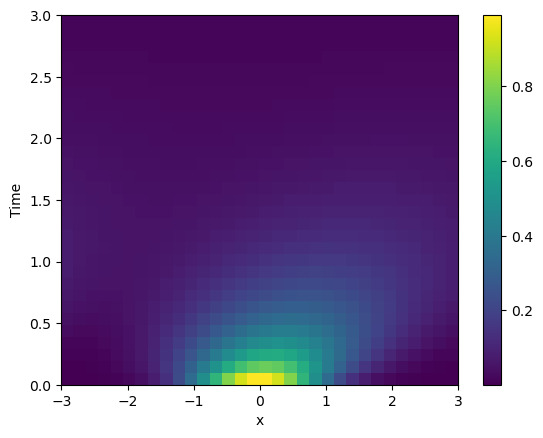

In [5]:
# Example 1
eq = PDE({"u": "laplace(u) - u - d_dx(u)"})
grid = CartesianGrid([[-3, 3]], [32], periodic=True)
state = ScalarField.from_expression(grid, "exp(-x**2)")

# solve the equation and store the trajectory
storage = MemoryStorage()
sol = eq.solve(state, t_range=3, tracker=storage.tracker(0.1))

# plot the trajectory as a space-time plot
plot_kymograph(storage)

In [12]:
# Time t from 4 to 5 with increment 0.1
t_num = 100
x_num = 50
grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "exp(-x**2)")
x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(1,2,t_num)

In [13]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [14]:
pypde_performance = []
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx - u - ux, squared = False))


0.005971522089730388
0.0051145357909177305
0.0031081145347238936
0.003468182469419389
0.006255935347427624
0.0044677585102093804
0.0039230476213163125
0.001740465944885283
0.002527358589096806


In [6]:
# Time t from 4 to 5 with increment 0.1
t_num = 100
x_num = 50
grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "exp(-x**2)")
x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(4,5,t_num)

In [7]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [10]:
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx - u - ux, squared = False))


0.00020373970403782726
0.0005766456958226885
0.0003030190321845596
0.0003925840030372568
0.0002401780331600079
0.00012799253643741514
0.00024250458096285396
9.551998973809707e-05
0.0002257563715052499


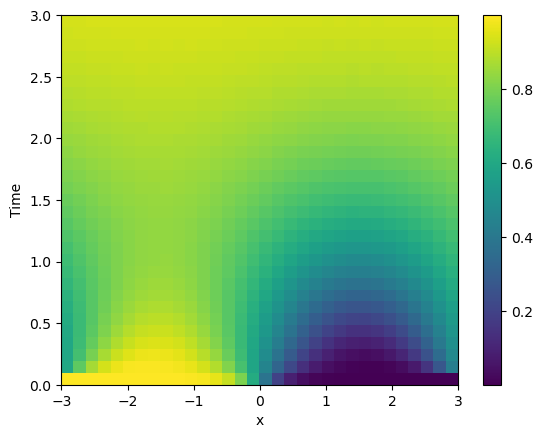

In [3]:
# Example 2
eq = PDE({"u": "laplace(u) + u*(1-u)"})
grid = CartesianGrid([[-3, 3]], [32], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(5*x))")

# solve the equation and store the trajectory
storage = MemoryStorage()
sol = eq.solve(state, t_range=3, tracker=storage.tracker(0.1))

# plot the trajectory as a space-time plot
plot_kymograph(storage)

In [4]:
x_num = 300
t_num = 100

grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(x))")

x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(1,2,t_num)

In [5]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [6]:
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx + u*(1-u), squared = False))

1.3359982906656598
0.8002476014191483
2.840005458213851
1.9557242487251667
0.6974280050072778
4.349275879721692
6.308066741232676
0.7507404465452755
5.207467548089411


In [7]:
x_num = 300
t_num = 100

grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(x))")

x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(4,5,t_num)

In [8]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [9]:
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx + u*(1-u), squared = False))


6.998689580818055
0.6687768347512514
1.1768155326529852
3.075158802961804
1.469308010418405
1.8539078965272688
2.374301473149066
1.2099606171624473
0.9588699322885481


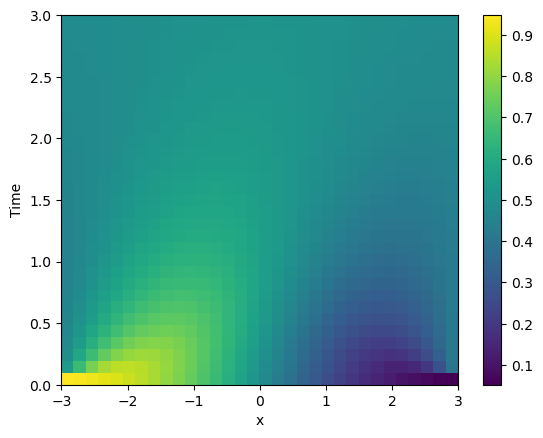

In [10]:
# Example 3
eq = PDE({"u": "laplace(u) - u*d_dx(u)"})
grid = CartesianGrid([[-3, 3]], [32], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(x))")

# solve the equation and store the trajectory
storage = MemoryStorage()
sol = eq.solve(state, t_range=3, tracker=storage.tracker(0.1))

# plot the trajectory as a space-time plot
plot_kymograph(storage)

In [11]:
x_num = 300
t_num = 100

grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(x))")

x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(1,2,t_num)

In [12]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [13]:
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx - u*ux, squared = False))

0.68064603025391
0.34367309485792485
0.8102759562435694
1.031191558176792
1.4248008284998077
1.2952939680558333
3.906763925919413
0.7803196572451526
1.2277032150941425


In [14]:
x_num = 300
t_num = 100

grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(x))")

x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(4,5,t_num)

In [15]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [16]:
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx - u*ux, squared = False))

0.34820262508260896
1.038269414930917
0.8564423969096734
0.41913447200329723
1.9579971505456935
1.1987257643936131
1.1930433797060203
1.5864593248584926
0.7159637106624557
